# matplotlibを用いたアニメーション作成
アニメーション作成は、データやその解析結果を視覚的に分かりやすく見せる上でとても有効な手段です。  
ここでは、matplotlib.animationモジュールを用いて、pythonでアニメーションを作成してみようと思います。

In [1]:
# モジュールのインポート
import matplotlib.animation as anm #<-これがanimationを作成する際に使用するモジュール。
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# ↓を加えることで、matplotlibのnbagg(Jupyter上でのインタラクティブな画像表示を実現するための機能)が有効になり、Jupyter上でアニメーションが再生できます。
%matplotlib nbagg

試しに、sinカーブが水平方向に伝播するようなアニメーションを作成してみましょう。

<IPython.core.display.Javascript object>


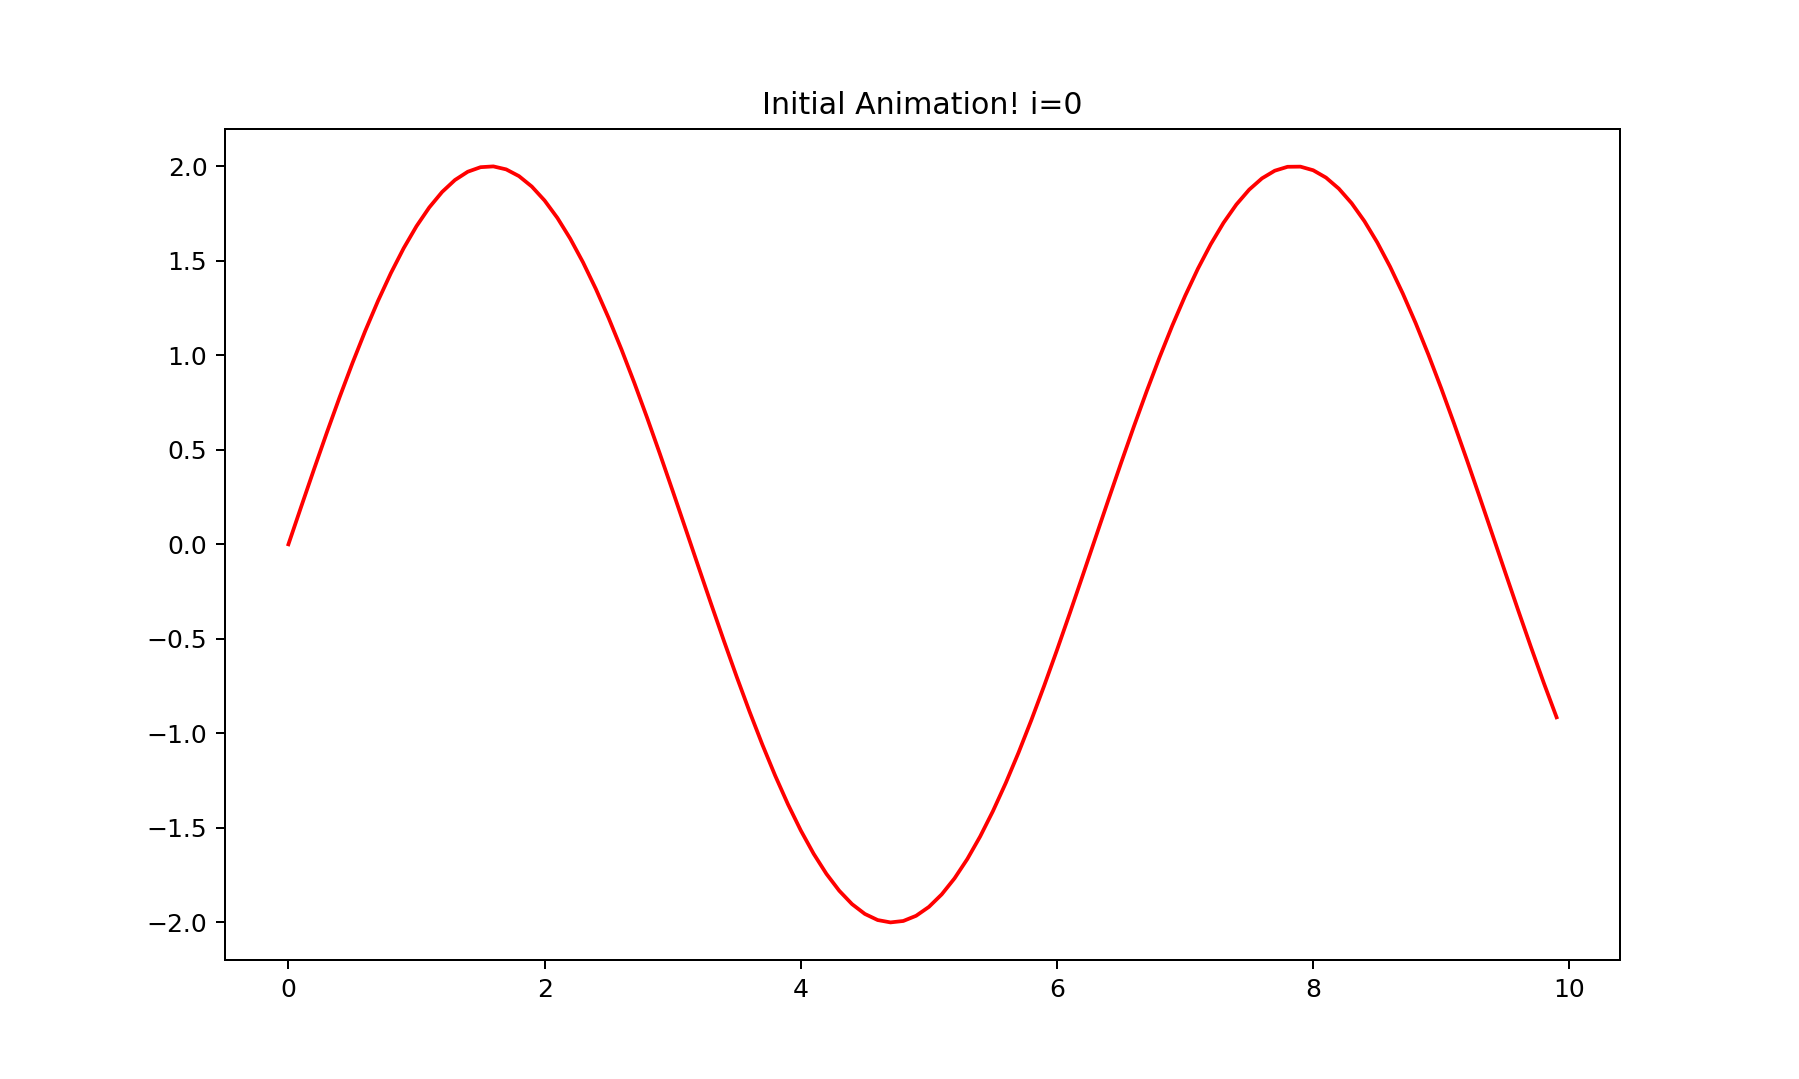

In [3]:
fig = plt.figure(figsize = (10, 6))
x = np.arange(0, 10, 0.1)

def update(i, fig_title, A):
    plt.cla()                      # 現在描写されているグラフを消去

    y = A * np.sin(x - i)
    plt.plot(x, y, "r")
    plt.title(fig_title + 'i=' + str(i))


ani = anm.FuncAnimation(fig, update, fargs = ('Initial Animation! ', 2.0), \
    interval = 100, frames = 32)


# 作成されたアニメーションをファイルとして保存したいときには、以下の行も実行する。

# gifファイルとして保存したいときには、予めImageMagickというアプリケーションをインストールした上で、writer = 'imagemagick' と指定する(UNIX系OSの場合)。
# ani.save("Sample.gif", writer = 'imagemagick')

# mp4ファイルとして保存したいときには、予めffmpeg(動画と音声を変換することのできるUNIX系OS生まれのフリーソフトウェア)をインストールしておく(UNIX系OSの場合)。
ani.save("Sample.mp4")

## 第1引数 fig

figureオブジェクト。このオブジェクトに、図(アニメーション)に関する命令を与えていく。  

## 第2引数 update

アニメーションを構成する図1枚1枚を作成するコールバック関数。  
アニメーションを作成するということは複数の図を作成してそれをつなぎ合わせるということであるが、FuncAnimation関数では、それを「図を作成する関数を複数回呼び出す」という方法で実現している。  
update関数の決まりは以下の通り。  

 - FuncAnimation関数よりも前で定義しておく。
 - この関数が呼び出されるときに、図が初期化されるようにしておく(そうしないと、plotが1つ前のfigに重ね書きされてしまう)。
     - 上記サンプルプログラムのplt.cla()の部分がそれに対応
 - この関数には少なくとも1つ引数を設ける。
     - この関数の第1引数(上記サンプルプログラムではi)は、この関数が呼び出される毎に0から1ずつ増えていく整数である。
     - この関数に2つ以上の引数を設けたい場合には、fargsで指定してやる(後述)。

## オプション fargs

第2引数のupdate関数に2つ以上の引数を設けたい場合に、2つ目以降の引数を指定することが出来るオプション。  
上記のサンプルプログラムの例だと、update関数の第2引数fig_titleに"Initial Animation!"が、第3引数Aに2.0がそれぞれ渡される。  

## オプション interval

アニメーションで図が切り替わる時間間隔を指定することが出来る(単位はミリ秒)。  
interval = 100 とすると、「100ミリ秒に1回図が切り替わる」ようになる。  

## オプション frames

update関数を呼び出す回数を指定する。  
frames = 132 とすると、update関数は132回呼び出され、これによって生成されたgifアニメは132枚の静止画を繋ぎ合わせたものになる。  
(update関数の第1引数のiはその間0,1,...,131の値をとる)  